In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

c:\Users\rajes\Downloads\archive (12)\myenv2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(79, 8)


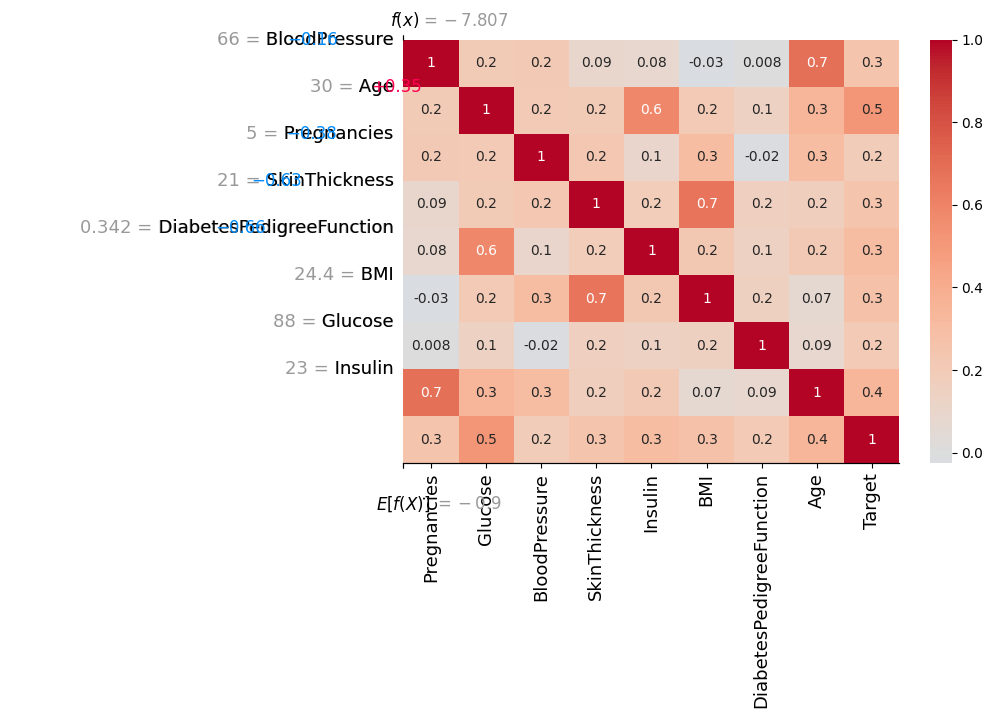

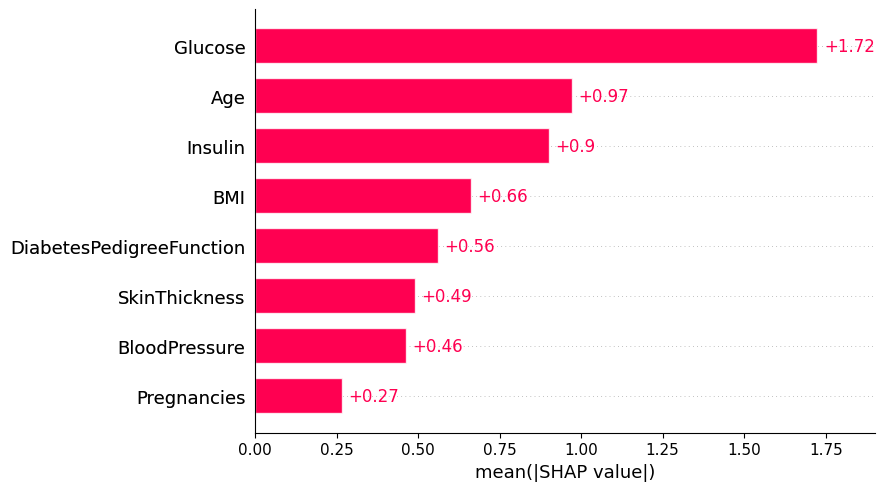

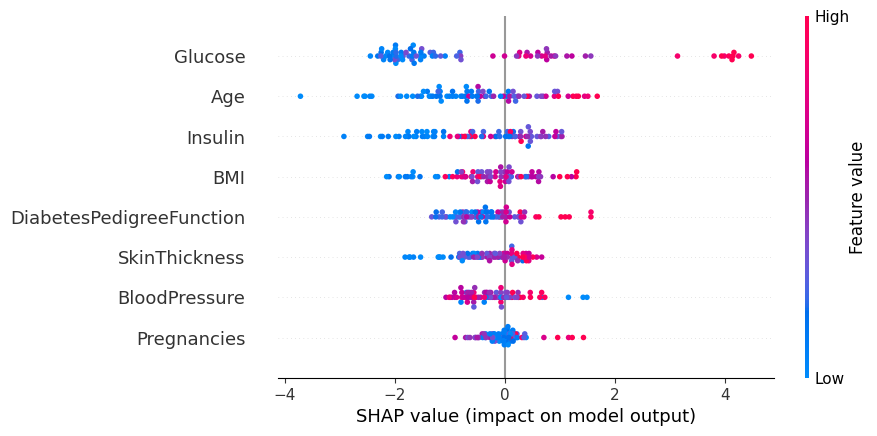

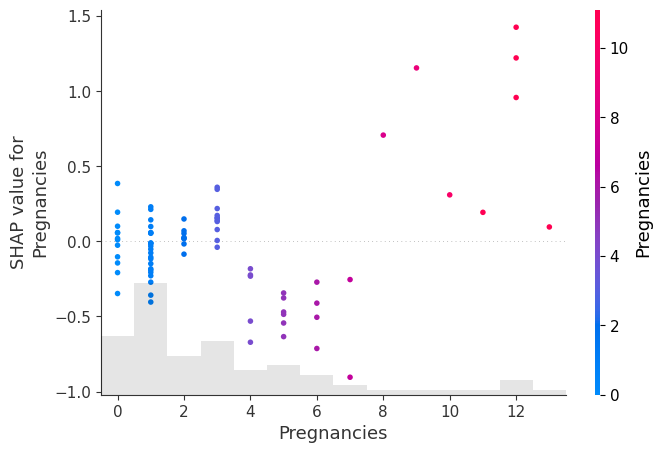

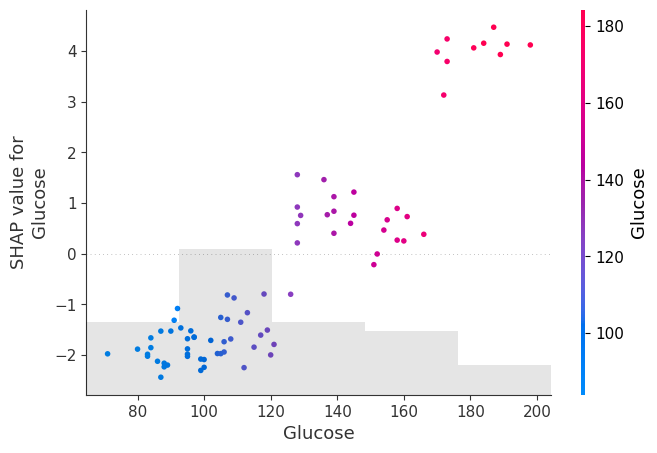

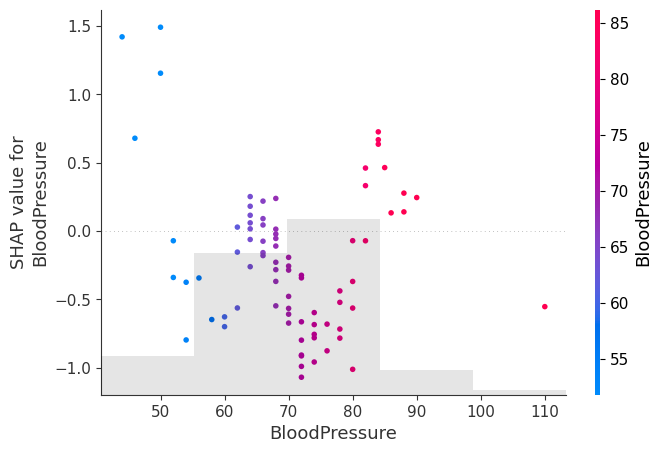

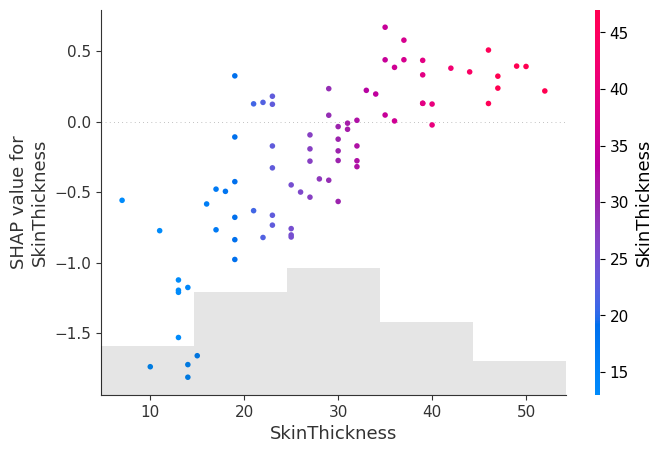

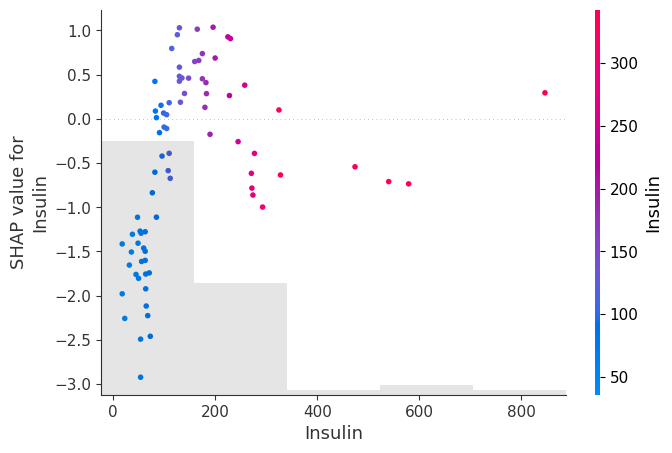

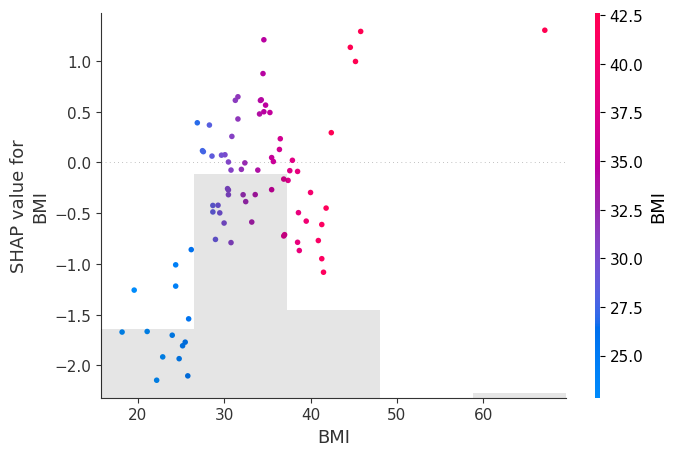

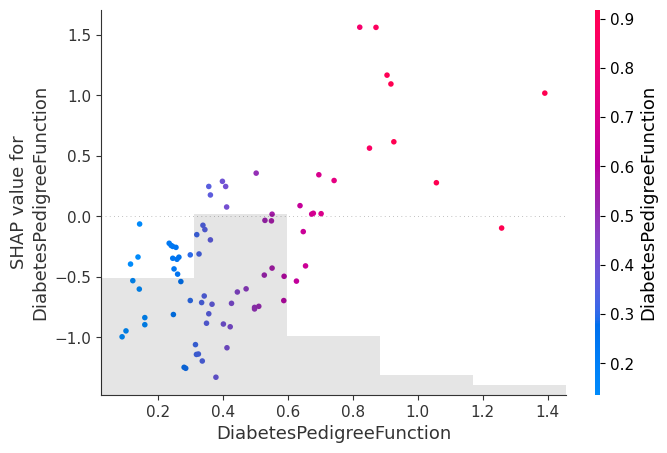

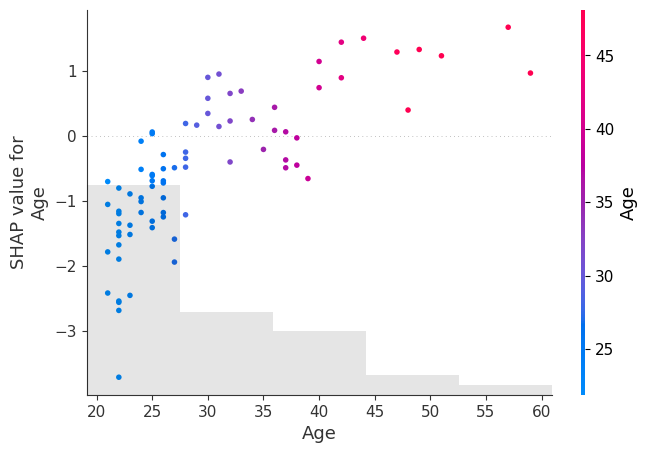

In [7]:
df=pd.read_csv("C:/Users/rajes/Downloads/diabetes_df.csv")
shap.initjs()#Intializing the shap object
df.head()
correlation_matrix=df.corr()#Calculation crellation between the features
sns.heatmap(correlation_matrix,cmap='coolwarm',center=0,annot=True,
            fmt='.1g')#ploting a heat mop to visualize the correlation in a better way
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=.2)#80:20 split ratio of data
model=xgb.XGBClassifier()#object creation of XGboost classifier
model.fit(X_train,y_train)#Fitting the data
y_pred=model.predict(X_test)#Calculating the model predicted values for test dataset
explainer=shap.Explainer(model)#Creating a explainer object
shap_values=explainer(X_test)#calculating shap values for each record and shap value of feature in that record since it is a binary classification shap values are calulated using log odd values
print(np.shape(shap_values.values))#I shows shape of shapvalues where 0 index value indicates number of records and 1 st index value indicates number of features it is matrix of shap values
shap.plots.waterfall(shap_values[0])#Waterfall plot of 1st record
shap.plots.force(shap_values)#stacked Force plot of all the records shapvalues combined
shap.plots.bar(shap_values)#a plot between features and absolute mean shap values
shap.plots.beeswarm(shap_values)#beeswarm plot features and shap values
columns=X_train.columns
for col in columns:
    shap.plots.scatter(shap_values[:,col],color=shap_values[:,col]) #plotting the distribution od shap values for each feature

In [8]:
shap.plots.force(shap_values)

(79, 8)


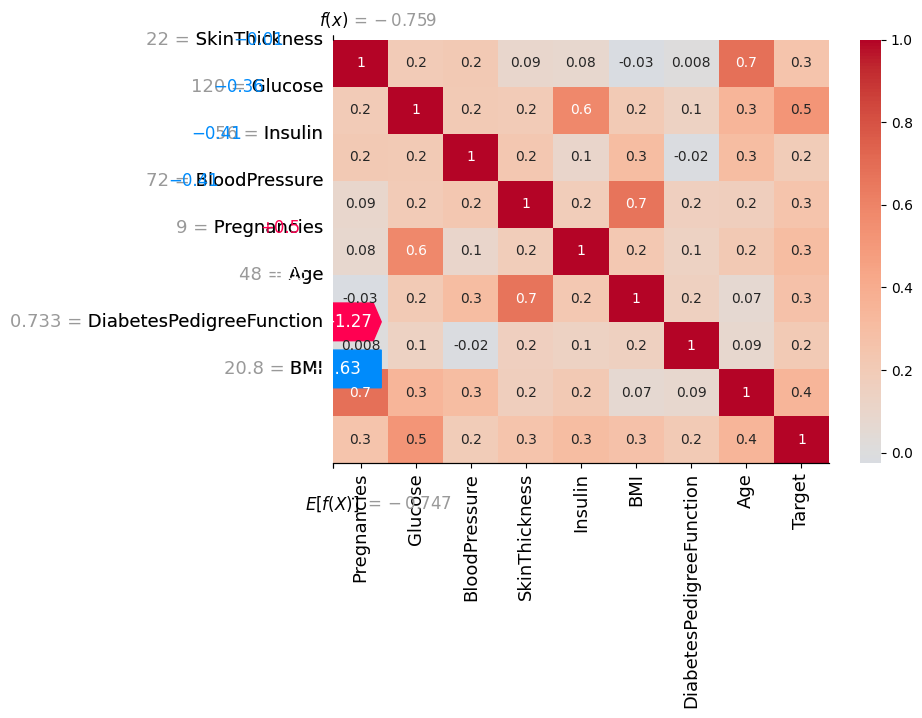

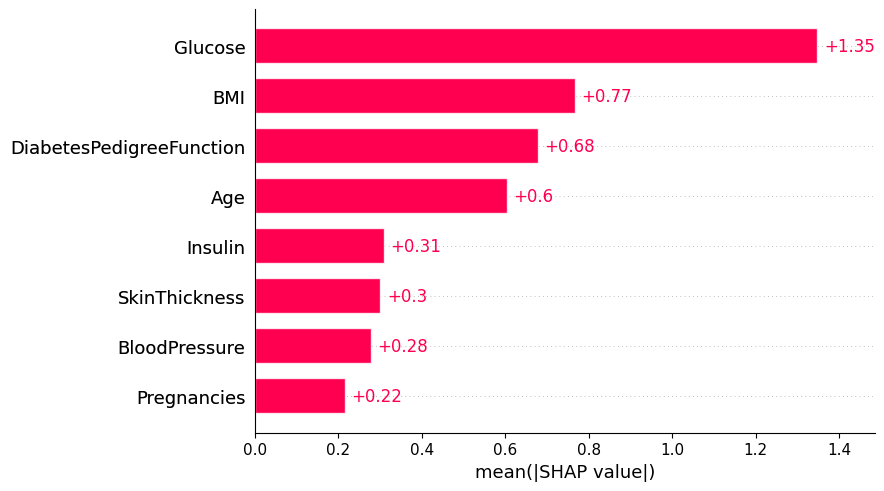

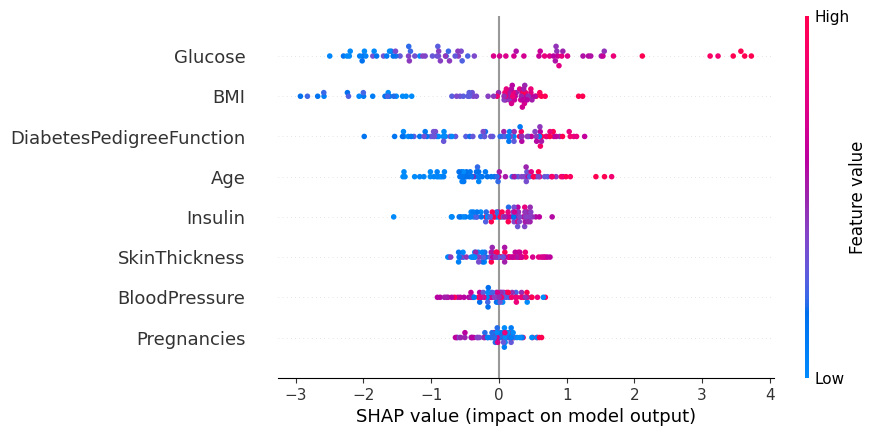

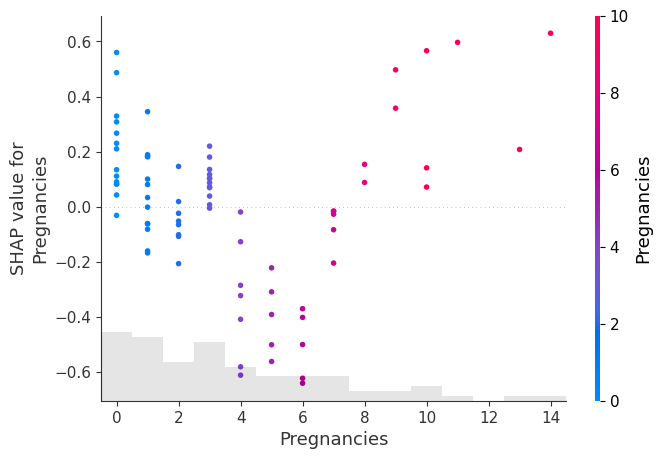

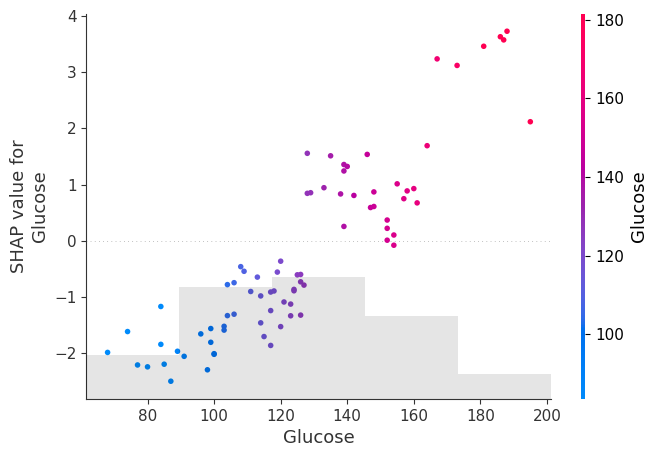

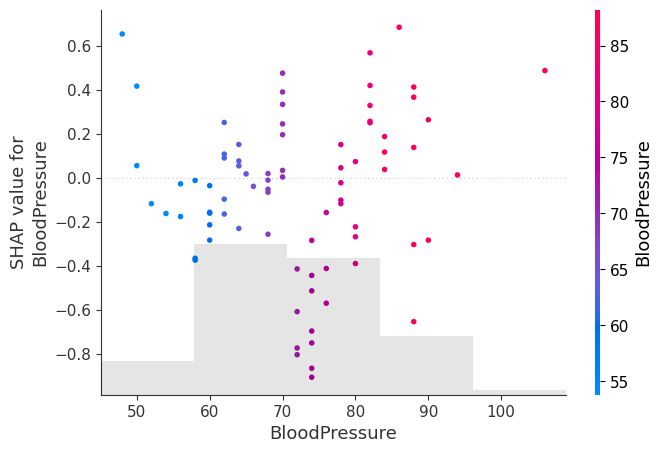

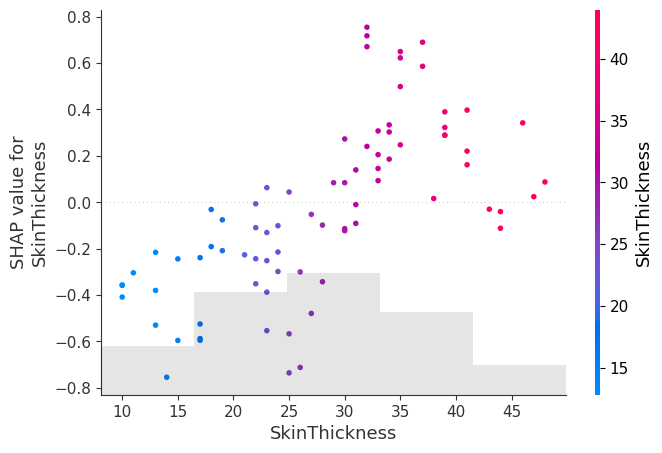

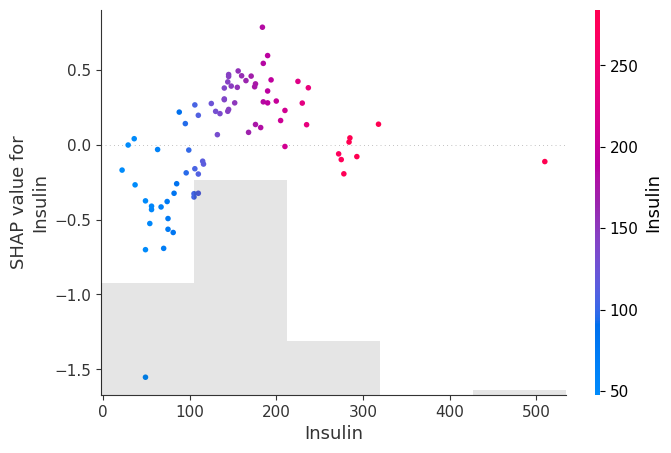

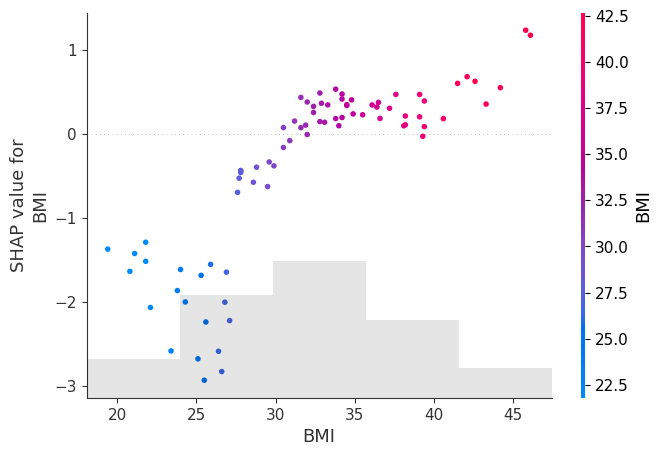

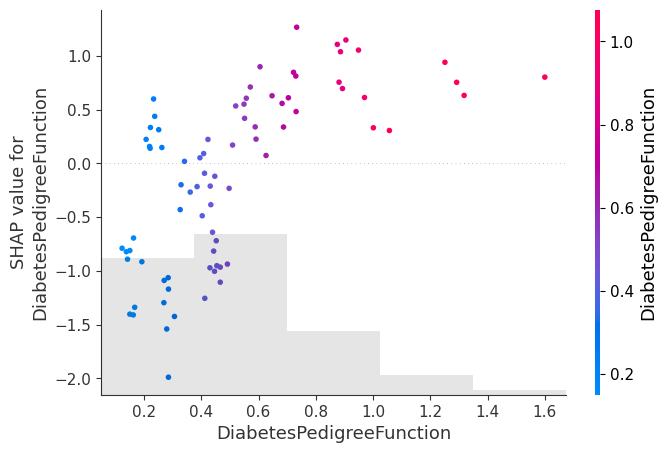

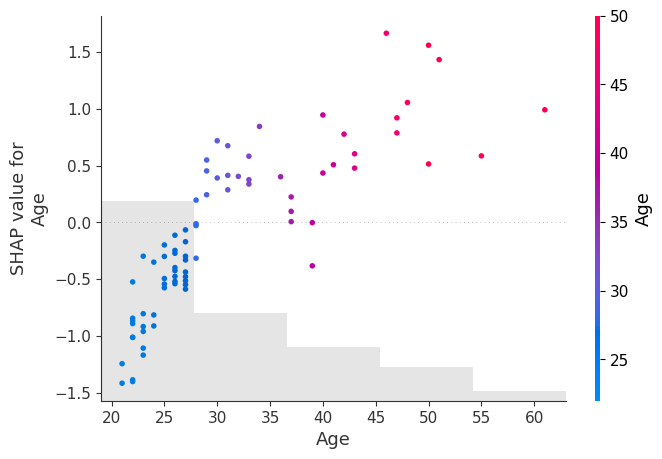

In [13]:
df=pd.read_csv("C:/Users/rajes/Downloads/diabetes_df.csv")
shap.initjs()#Intializing the shap object
df.head()
correlation_matrix=df.corr()#Calculation crellation between the features
sns.heatmap(correlation_matrix,cmap='coolwarm',center=0,annot=True,
            fmt='.1g')#ploting a heat mop to visualize the correlation in a better way
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=.2)#80:20 split ratio of data
model=xgb.XGBClassifier(learning_rate=.02,n_estimators=600,objective='binary:logistic',nthread=1)#object creation of XGboost classifier
model.fit(X_train,y_train)#Fitting the data
y_pred=model.predict(X_test)#Calculating the model predicted values for test dataset
explainer=shap.Explainer(model)#Creating a explainer object
shap_values=explainer(X_test)#calculating shap values for each record and shap value of feature in that record since it is a binary classification shap values are calulated using log odd values
print(np.shape(shap_values.values))#I shows shape of shapvalues where 0 index value indicates number of records and 1 st index value indicates number of features it is matrix of shap values
shap.plots.waterfall(shap_values[0])#Waterfall plot of 1st record
shap.plots.force(shap_values)#stacked Force plot of all the records shapvalues combined
shap.plots.bar(shap_values)#a plot between features and absolute mean shap values
shap.plots.beeswarm(shap_values)#beeswarm plot features and shap values
columns=X_train.columns
for col in columns:
    shap.plots.scatter(shap_values[:,col],color=shap_values[:,col]) #plotting the distribution od shap values for each feature

In [11]:
shap.plots.force(shap_values)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,1,89,66,23,94.0,28.1,0.167,21,0
1,0,137,40,35,168.0,43.1,2.288,33,1
2,3,78,50,32,88.0,31.0,0.248,26,1
3,2,197,70,45,543.0,30.5,0.158,53,1
4,1,189,60,23,846.0,30.1,0.398,59,1


In [14]:
import os 
os.getcwd()

'c:\\Users\\rajes\\Downloads\\archive (12)'